
# Load Dataset


In [1]:
import pandas as pd
import csv
from pathlib import Path

# Use the current working directory as the base directory
base_dir = Path.cwd()

# Construct the file path
file_path = base_dir  / 'raw' / 'data.tsv'

# file_path='/home/atik/Desktop/POS-NER-TAG/data/raw/data.tsv'
data=pd.read_csv(file_path,sep='\t')
data

,,শনিবার (২৭ আগস্ট) রাতে পটুয়াখালী সদর থানার ভারপ্রাপ্ত কর্মকর্তা (ওসি) মো. মনিরুজ্জামান এ তথ্য নিশ্চিত করেছেন।
শনিবার,NNP,B-D&T
(২৭,PUNCT,B-OTH
আগস্ট),NNP,B-D&T
রাতে,NNC,B-D&T
পটুয়াখালী,NNP,B-GPE
...,...,...
সফর,NNC,B-OTH
বিনিময়ের,NNC,B-OTH
উপর,PP,B-OTH
গুরুত্বারোপ,NNC,B-OTH


In [2]:
df = pd.read_csv(file_path, sep='\t', header=None, names=['Word', 'POS', 'NER'])
df.iloc[0]

Word    শনিবার (২৭ আগস্ট) রাতে পটুয়াখালী সদর থানার ভা...
POS                                                   NaN
NER                                                   NaN
Name: 0, dtype: object

#### Data Formatting

The current data format is not suitable for our needs. We need to restructure this dataset. In the following steps, I will load the dataset and separate it into columns for sentences, tokens, and their corresponding POS and NER tags

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and preprocess the dataset
def load_dataset(file_path):
    sentences = []
    words = []
    pos_tags = []
    ner_tags = []

    with open(file_path, 'r', encoding='utf-8') as file:
        sentence_words = []
        sentence_pos = []
        sentence_ner = []
        
        for line in file:
            line = line.strip()
            if not line:
                if sentence_words:  # End of a sentence
                    sentences.append(' '.join(sentence_words))
                    words.extend(sentence_words)
                    pos_tags.extend(sentence_pos)
                    ner_tags.extend(sentence_ner)
                    sentence_words = []
                    sentence_pos = []
                    sentence_ner = []
            else:
                parts = line.split('\t')
                if len(parts) == 3:
                    word, pos, ner = parts
                    sentence_words.append(word)
                    sentence_pos.append(pos)
                    sentence_ner.append(ner)
        
        # Append the last sentence if file does not end with a newline
        if sentence_words:
            sentences.append(' '.join(sentence_words))
            words.extend(sentence_words)
            pos_tags.extend(sentence_pos)
            ner_tags.extend(sentence_ner)

    return pd.DataFrame({'Word': words, 'POS': pos_tags, 'NER': ner_tags}), sentences

# Load the dataset
df,sentences = load_dataset(file_path)


In [4]:
df.head()


,Word,POS,NER
0,শনিবার,NNP,B-D&T
1,(২৭,PUNCT,B-OTH
2,আগস্ট),NNP,B-D&T
3,রাতে,NNC,B-D&T
4,পটুয়াখালী,NNP,B-GPE


### Extracting Unique POS and NER Tags

In this section, we extract and count the unique Part-of-Speech (POS) tags and Named Entity Recognition (NER) tags from the dataset. 


In [5]:
unique_pos_tags = df['POS'].unique()
num_unique_pos_tags = len(unique_pos_tags)

# Find unique NER tags
unique_ner_tags = df['NER'].unique()
num_unique_ner_tags = len(unique_ner_tags)
print("Unique NER Tags :",unique_ner_tags)
print("Unique NER Tags :",unique_pos_tags)

Unique NER Tags : ['B-D&T' 'B-OTH' 'B-GPE' 'I-GPE' 'B-PER' 'I-PER' 'B-LOC' 'I-LOC' 'B-ORG'
 'B-EVENT' 'I-EVENT' 'B-NUM' 'I-ORG' 'I-D&T' 'B-UNIT' 'B-MISC' 'B-T&T'
 'I-NUM' 'I-T&T' 'I-MISC' 'I-UNIT']
Unique NER Tags : ['NNP' 'PUNCT' 'NNC' 'ADJ' 'DET' 'VF' 'CONJ' 'PRO' 'VNF' 'PP' 'QF' 'ADV'
 'PART' 'OTH' 'INTJ']


#### Basic Information
Number of column and Null value check



In [6]:
# Basic Information
print("\nBasic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78374 entries, 0 to 78373
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    78374 non-null  object
 1   POS     78374 non-null  object
 2   NER     78374 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB
None


#### Summary Statistics


In [7]:

print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
         Word    POS    NER
count   78374  78374  78374
unique  23752     15     21
top         ও    NNC  B-OTH
freq      763  30660  53550


#### Length Of Unique POS and NER Tag

In [8]:
# Unique Values in POS and NER Tags

print("Number of Unique POS Tags:", len(unique_pos_tags))

print("Number of Unique NER Tags:", len(unique_ner_tags))


Number of Unique POS Tags: 15
Number of Unique NER Tags: 21


### Frequency Of POS and NER Tag 

In [9]:
# Distribution of POS and NER Tags
pos_tag_counts = df['POS'].value_counts()
ner_tag_counts = df['NER'].value_counts()

print("\nPOS Tag Counts:")
print(pos_tag_counts)

print("\nNER Tag Counts:")
print(ner_tag_counts)


POS Tag Counts:
POS
NNC      30660
NNP      12977
ADJ       8076
VF        7601
QF        3364
PP        3149
VNF       2767
ADV       2567
PRO       2422
CONJ      1642
PUNCT     1520
DET       1330
PART       150
OTH        113
INTJ        36
Name: count, dtype: int64

NER Tag Counts:
NER
B-OTH      53550
B-PER       6158
B-ORG       2742
I-PER       2468
B-NUM       2292
I-ORG       1943
B-GPE       1746
B-D&T       1671
I-D&T       1353
B-EVENT      991
B-LOC        797
B-UNIT       546
I-EVENT      446
I-LOC        442
I-NUM        427
B-MISC       383
B-T&T        172
I-GPE         85
I-T&T         77
I-MISC        65
I-UNIT        20
Name: count, dtype: int64


### Visualization of POS Tags Frequency


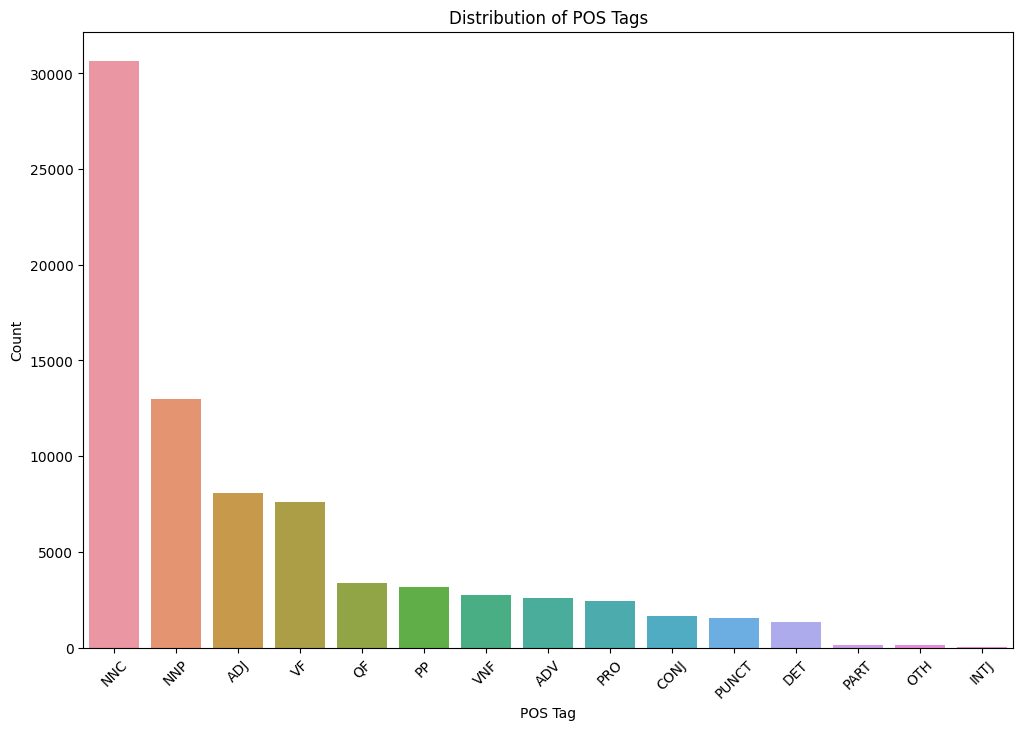

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(x='POS', data=df, order=pos_tag_counts.index)
plt.title('Distribution of POS Tags')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### Visualization of NER Tags Frequency


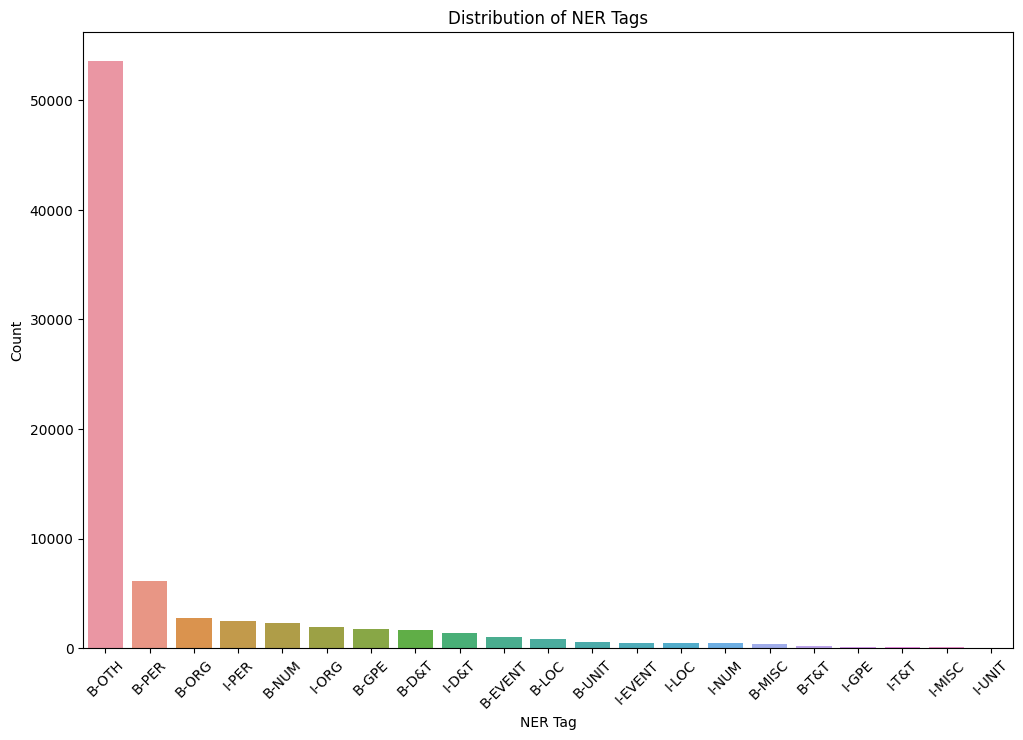

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(x='NER', data=df, order=ner_tag_counts.index)
plt.title('Distribution of NER Tags')
plt.xlabel('NER Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()